# Project: Wrangling and Analyze Data

# Imports 

In [19]:
import pandas as pd 
import numpy as np
import json 
import requests
import tweepy 
import regex as re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.io as pio
pio.renderers.default= "notebook_connected"

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [119]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [120]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open("image-predictions.tsv", "wb").write(response.content)

335079

In [121]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
# Import my api keys form python file as package 
from SaadKEY import consumerKey, consumerSecret, accessToken, accessTokenSecret


consumer_key = consumerKey
consumer_secret = consumerSecret
access_token = accessToken
access_token_secret = accessTokenSecret

In [17]:
#Creating a variable calling Authentication Handler and passing all of the keys from above as arguments.
auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

#Connecting to Twitter API by passing the variable created above that contains all the keys.
api = tweepy.API(auth)

In [18]:
# First we get the twitter ids from the tweet df and put it to list 
tweets_ids = twitter_df['tweet_id'].values
print(f'Number of twitter ids we need: {len(tweets_ids)}')

Number of twitter ids we need: 2356


In [62]:
# Define list to put all whole tweet informations by using the previous ids
tweets_information = []
# Define list to put the ids that fail to found information about it 
fail_tweets_id = []

# Iterate on the ids and get the tweet information for each id 
for id in tweets_ids:
    try:
        tweets_information.append(api.get_status(id)._json)
    except Exception as e:
        fail_tweets_id.append(id)


In [77]:
print(f'Number of successful tweet information: {len(tweets_information)}\nNumber of failed tweet: {len(fail_tweets_id)}')

Number of successful tweet information: 1751
Number of failed tweet: 605


In [ ]:
# Save all tweet information to all tweet information text file 
with open('all-tweet-information.txt', 'w', encoding="utf-8") as file:
    json.dump(tweets_information, file,ensure_ascii=False)

In [76]:
# Create another file that contains only tweet ID, retweet count, and favorite count.
# Read the file which has all tweet information
with open('all-tweet-information.txt') as file:
    tweets_informations = json.load(file)
    # Declear an list to put all selective twitter information
    newFile_list = []
    for t_info in tweets_informations:
        newFile_list.append({'tweet_id': t_info['id'],'retweet_count': t_info['retweet_count'],'favorite_count': t_info['favorite_count']})

    # Save the new json informtion to new file with tweet_json.txt name 
    with open('tweet_json.txt', 'w', encoding="utf-8") as newfile:
        json.dump(newFile_list, newfile, ensure_ascii=False)

# Here Import the tweet json file **

In [123]:
# Load the new tweet json with specific columns we took it before
with open('tweet_json.txt') as file:
    tweet_json = json.load(file)

# Create dataframe from the json file 
tweet_json = pd.DataFrame(tweet_json)
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6886,32925
1,892177421306343426,5184,28470
2,891815181378084864,3424,21384
3,891689557279858688,7097,35914
4,891327558926688256,7616,34334
...,...,...,...
1746,674024893172875264,1059,1552
1747,674019345211760640,259,991
1748,674014384960745472,547,1361
1749,674008982932058114,294,1064


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



twitter_df , image_predictions, tweet_json

## Explore twitter dataframe

In [124]:
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
50,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t.co/Nx52PGwH94,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270321602560/photo/1,13,10,Stanley,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Curtis. He's a fluffball. 11/10 would snug this pupper https://t.co/1DzInODwrj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254459715584/photo/1,11,10,Curtis,None,None,pupper,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
1299,707738799544082433,NaN,NaN,2016-03-10 01:24:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",He's doing his best. 12/10 very impressive that he got his license in the first place https://t.co/2vRmkkOLcN,NaN,NaN,NaN,https://vine.co/v/hUvHKYrdb1d,12,10,None,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,None,None,None,None


In [125]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [126]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [127]:
twitter_df.describe(exclude='number')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [128]:
# Get the percentage of null values based on the whole dataframe rows
twitter_df.isna().sum() / twitter_df.shape[0]

tweet_id                      0.000000
in_reply_to_status_id         0.966893
in_reply_to_user_id           0.966893
timestamp                     0.000000
source                        0.000000
text                          0.000000
retweeted_status_id           0.923175
retweeted_status_user_id      0.923175
retweeted_status_timestamp    0.923175
expanded_urls                 0.025042
rating_numerator              0.000000
rating_denominator            0.000000
name                          0.000000
doggo                         0.000000
floofer                       0.000000
pupper                        0.000000
puppo                         0.000000
dtype: float64

In [129]:
# Rows that retweeted_status_id is not null 
twitter_df[~twitter_df['retweeted_status_id'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

In [130]:
# Rows that retweeted_status_id is null (That is mean is original tweet)
twitter_df[twitter_df['retweeted_status_id'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [131]:
# Check if there a duplicate in the tweeter dataframe 
twitter_df[twitter_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [132]:
twitter_df['rating_numerator']

0       13
1       13
2       12
3       13
4       12
        ..
2351    5 
2352    6 
2353    9 
2354    7 
2355    8 
Name: rating_numerator, Length: 2356, dtype: int64

In [133]:
twitter_df[twitter_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\user\AppData\Local\Temp\ipykernel_26412\2205439102.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


## Image Predection

In [134]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
792,690728923253055490,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,kuvasz,0.422806,True,golden_retriever,0.291586,True,Great_Pyrenees,0.076189,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/676776408941662209/pu/img/k-6I3YEZAQtYPBXR.jpg,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True


In [135]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [136]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [137]:
image_predictions.describe(exclude='number')

,jpg_url,p1,p1_dog,p2,p2_dog,p3,p3_dog
count,2075,2075,2075,2075,2075,2075,2075
unique,2009,378,2,405,2,408,2
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,True,Labrador_retriever,True,Labrador_retriever,True
freq,2,150,1532,104,1553,79,1499


In [138]:
# Get the percentage of null values based on the whole dataframe rows
image_predictions.isna().sum() / image_predictions.shape[0]

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [139]:
# Check if there a duplicate in the image_predictions dataframe 
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [140]:
image_predictions[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False)].shape[0] / image_predictions.shape[0]

0.156144578313253

### Quality issues
1- There is some rows have retweet and doesn't have null values on (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id) columns, That is mean if this tweet is not retweeted or replay then will be null, and actualy these is doesn't need it in our final data.

2- The datatype of the timestamp is string and we need it to be a datetime type to deal with it easier and we can take only the 2017 1st aug, also the type of user id columns and the rest columns is float and that not make sense.

3- The text content is contains urls and this is not good for reading later also because the tweet url is in other column already.

4- The name column and the next 3 columns are contanin null values but it's represntaive by None word.

5- The names in name column contain 'a','an' word or contain name start with small letter like 'one', so this is not the name of the dog in the real tweet.

6- The source is have unreadable source name because have the html tags and it's need to remove it.<br><br>
7- The rating type not float and actual tweet have decimals <br><br>
***
8- The p columns in image predections dataframe has unconcistiny name some is connected and some is with _. <br><br>

### Tidiness issues
1- We need to merge all the three datasets to make meaningful and extract the information faster.<br><br>
2- The dog type (doggo,floofer,pupper,puppo) in Twitter Dataframe need to be one column. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [141]:
# Make copies of original pieces of data
twitter_df_copy = twitter_df.copy()
image_predictions_copy = image_predictions.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1:

#### Define: There is some rows have retweet and doesn't have null values on (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id) columns, That is mean if this tweet is not retweeted or replay then will be null, and actualy these is doesn't need it in our final data

#### Code

**Here I take rows that have not retweeted or reply**

In [142]:
# First we need to keep rows with null values to make sure there is no retweets or reply
twitter_df_copy = twitter_df_copy[(twitter_df_copy['retweeted_status_id'].isna()) & (twitter_df_copy['in_reply_to_status_id'].isna())].copy()
# So, we drop nearly 260 rows to insure there is no retweet or reply tweets

**After I Have tweets that have not retweeted than i'll drop the unwanted columns**

In [143]:
# Second after delete the retweets we don't need to keep of these columns so we will drop it
twitter_df_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1, inplace=True)

#### Test

In [144]:
# As you see here we the column was droped and the rows is decreasing form the original dataframe
print(f'New dataframe shape: {twitter_df_copy.shape}\nOld dataframe shape: {twitter_df.shape}')
twitter_df_copy

New dataframe shape: (2097, 12)
Old dataframe shape: (2356, 17)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


### Issue #2:

#### Define: The datatype of the timestamp is string and we need it to be a datetime type to deal with it easier and we can take only the 2017 1st aug, also the type of user id columns and the rest columns is float and that not make sense.

#### Code

In [145]:
twitter_df_copy['timestamp'] = pd.to_datetime(twitter_df_copy['timestamp'])

#### Test

In [146]:
# As you see here we change the datatype of timestamp form object to datetime
twitter_df_copy.dtypes

tweet_id              int64              
timestamp             datetime64[ns, UTC]
source                object             
text                  object             
expanded_urls         object             
rating_numerator      int64              
rating_denominator    int64              
name                  object             
doggo                 object             
floofer               object             
pupper                object             
puppo                 object             
dtype: object

### Issue #3:

#### Define: The source is have unreadable source name because have the html tags and it's need to remove it.

#### Code

In [147]:
# So here we apply labmda function for each text in source column and split the text and take only the name of actually source
twitter_df_copy['source'] = twitter_df_copy['source'].apply(lambda x : str(x).split('"nofollow">')[1].split('</a>')[0])

#### Test

In [148]:
# As you see here we change source so now it's appeare only the source name without tags, also the text now doesn't have urls
twitter_df_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


### Issue #4:

#### Define: The text content is contains urls and this is not good for reading later also because the tweet url is in other column already.


#### Code

In [149]:
# Here is same above function but here just to take the text before the url
twitter_df_copy['text'] = twitter_df_copy['text'].apply(lambda x : str(x).split('https:')[0])

#### Test

In [150]:
# As you see here we change source so now it's appeare only the text without urls
twitter_df_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


### Issue #5:

#### Define: The name column and the next 3 columns are contanin null values but it's represntaive by None word.

#### Code

In [151]:
# Fill the None with NaN to dropna later
twitter_df_copy[['doggo','floofer','pupper','puppo']] = twitter_df_copy[['doggo','floofer','pupper','puppo']].replace({'None':np.nan})

#### Test

In [152]:
# As you see here we have now null values instaed None string, Need it to second issue
twitter_df_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #6:

#### Define: The name column and the next 3 columns are contanin null values but it's represntaive by None word.

#### Code

In [153]:
# Get the value comibe from 4 columns
twitter_df_copy['combined_type'] = twitter_df_copy[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.dropna()), axis =1)

Refrence: StackOverFlow [https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans]

In [154]:
# Drop unneeded columns after we combined them
twitter_df_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [155]:
# Replcae empty cell in combined type to Undifind 
twitter_df_copy['combined_type'] = twitter_df_copy['combined_type'].replace({'':'Undefind'})

In [156]:
# Because some types have comma spereate and the actual type is after the comma, so this function get the correct type
def get_correct_type(x):
    try:
        return x.split(',')[1]
    except:
        return x 

twitter_df_copy['combined_type'] = twitter_df_copy['combined_type'].apply(get_correct_type)

#### Test

In [157]:
# As you see here we have only the dog name and type (two columns )not like before 5 columns
twitter_df_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,combined_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,Undefind
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Undefind


In [158]:
# Here have only the type and as you see most of the data is undefind
twitter_df_copy['combined_type'].value_counts()

Undefind    1761
pupper      230 
doggo       72  
puppo       24  
floofer     10  
Name: combined_type, dtype: int64

### Issue #7:

#### Define: The names in name column contain 'a','an' word or contain name start with small letter like 'one', so this is not the name of the dog in the real tweet.

#### Code

In [159]:
# Check if the name is correct or not 
def is_name_correct(x):
    # If first letter is lower case than it's not name
    if str(x)[0].islower():
        return 'Undefind'
    # If the name is a or an than it's not name 
    if str(x)=='a' or str(x)=='an':
        return 'Undefind'
    # If the name is none 
    if str(x)=='None':
        return 'Undefind'
    else:
        return x 

In [160]:
twitter_df_copy['name'] = twitter_df_copy['name'].apply(is_name_correct)

#### Test

In [161]:
# As use see I change the all names to actuall names without error
twitter_df_copy['name'].value_counts()

Undefind      707
Lucy          11 
Charlie       11 
Oliver        10 
Cooper        10 
              .. 
Shelby        1  
Sephie        1  
Bonaparte     1  
Wishes        1  
Christoper    1  
Name: name, Length: 930, dtype: int64

### Issue #8:

#### Define:  The p columns in image predections dataframe has unconcistiny name some is connected and some is with _. 

#### Code

In [171]:
image_predictions_copy['p1']= image_predictions_copy['p1'].apply(lambda x: str(x).split('_')).apply(lambda x : ((x[0][0].upper() +x[0][1:])+x[1][0].upper()+x[0][1:]) if len(x)>1 else (x[0][0].upper() +x[0][1:])) 
image_predictions_copy['p2']= image_predictions_copy['p2'].apply(lambda x: str(x).split('_')).apply(lambda x : ((x[0][0].upper() +x[0][1:])+x[1][0].upper()+x[0][1:]) if len(x)>1 else (x[0][0].upper() +x[0][1:])) 
image_predictions_copy['p3']= image_predictions_copy['p3'].apply(lambda x: str(x).split('_')).apply(lambda x : ((x[0][0].upper() +x[0][1:])+x[1][0].upper()+x[0][1:]) if len(x)>1 else (x[0][0].upper() +x[0][1:])) 

#### Test

In [172]:
# As you see the ps name now have same way uppercase in first string and upper case in another sting with uppercase
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WelshSelsh,0.465074,True,Collie,0.156665,True,ShetlandShetland,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,MiniaturePiniature,0.074192,True,RhodesianRhodesian,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,GermanSerman,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RhodesianRhodesian,0.408143,True,Redbone,0.360687,True,MiniaturePiniature,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MiniaturePiniature,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,EnglishSnglish,0.225770,True,GermanSerman,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,PaperTaper,0.170278,False,LabradorRabrador,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Issue #9:

#### Define: The rating type not float and actual tweet have decimals.

#### Code

In [173]:
# Convert rating type to float 
twitter_df_copy['rating_numerator'] = twitter_df_copy['rating_numerator'].astype('float')

In [174]:
# Take the actual rating form original text
twitter_df_copy.loc[twitter_df_copy.text.str.contains(r"(\d+\.\d*\/\d+)"), 'rating_numerator'] = twitter_df_copy[twitter_df_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].apply(lambda x : re.findall("(\d+\.\d*\/\d+)", str(x))[0].split('/')[0])

C:\Users\user\AppData\Local\Temp\ipykernel_26412\1958535962.py:2: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



#### Test

In [175]:
twitter_df_copy.loc[twitter_df_copy.text.str.contains(r"(\d+\.\d*\/\d+)"), ['rating_numerator','text']]

C:\Users\user\AppData\Local\Temp\ipykernel_26412\1650550310.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,rating_numerator,text
45,13.5,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10"
695,9.75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10"
763,11.27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back
1712,11.26,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10


In [176]:
twitter_df_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,combined_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,Undefind
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,Undefind


### Issue #10:

#### Define: We need to merge all the three datasets to make meaningful and extract the information faster.

#### Code

In [177]:
merged_df = pd.merge(twitter_df_copy,image_predictions_copy,how='inner',on='tweet_id').merge(tweet_json_copy, how='inner', on='tweet_id')

#### Test

In [178]:
# As you see here we have all columns form all three dataframes in one dataframe
merged_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,combined_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,Undefind,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6886,32925
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,Undefind,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5184,28470
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,Undefind,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3424,21384
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,Undefind,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,PaperTaper,0.170278,False,LabradorRabrador,0.168086,True,Spatula,0.040836,False,7097,35914
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,Undefind,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,EnglishSnglish,0.225770,True,GermanSerman,0.175219,True,7616,34334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,674024893172875264,2015-12-08 00:37:11+00:00,Twitter for iPhone,When you realize it doesn't matter how hard you study. You're still going to fail. 10/10,https://twitter.com/dog_rates/status/674024893172875264/photo/1,10.0,10,Undefind,Undefind,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,PersianCersian,0.006448,False,1059,1552
1426,674019345211760640,2015-12-08 00:15:09+00:00,Twitter for iPhone,This is Acro. You briefly see her out of the corner of your eye. You look and she's not there. 10/10 mysterious pup,https://twitter.com/dog_rates/status/674019345211760640/photo/1,10.0,10,Acro,Undefind,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,Collie,0.992732,True,Borzoi,0.005043,True,ShetlandShetland,0.001725,True,259,991
1427,674014384960745472,2015-12-07 23:55:26+00:00,Twitter for iPhone,Say hello to Aiden. His eyes are magical. Loves his little Guy Fieri friend. Sneaky tongue slip. 11/10 would caress,https://twitter.com/dog_rates/status/674014384960745472/photo/1,11.0,10,Aiden,Undefind,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,EskimoDskimo,0.068321,True,547,1361
1428,674008982932058114,2015-12-07 23:33:58+00:00,Twitter for iPhone,This pup is sad bc he didn't get to be the toy car. Also he has shitty money management skills. 10/10 still cute tho,https://twitter.com/dog_rates/status/674008982932058114/photo/1,10.0,10,Undefind,Undefind,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,JigsawPigsaw,0.970810,False,PrayerRrayer,0.011048,False,Quill,0.008432,False,294,1064


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [179]:
merged_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualization 1

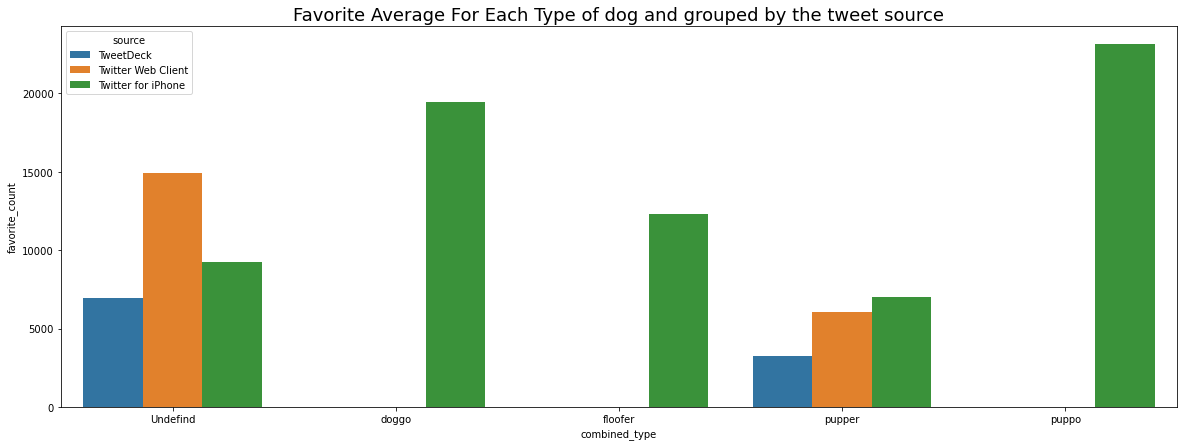

In [182]:
plt.figure(figsize = (20,7))
sns.barplot(data = merged_df.groupby(['combined_type','source']).mean().reset_index(),
 x='combined_type', 
 y='favorite_count',
 hue='source'
 )
plt.title('Favorite Average For Each Type of dog and grouped by the tweet source', size=18)
plt.show()

### Insights:
1. As you see here the puppo type has most popularity with 25k average likes.

2. the floofer has less likes.

3. most user tweets is from iphone (maybe because most of the tweets form one twitter account)

4. most of usert tweets that come from web client is with undefind type (anynoumus)

### Visualization 2

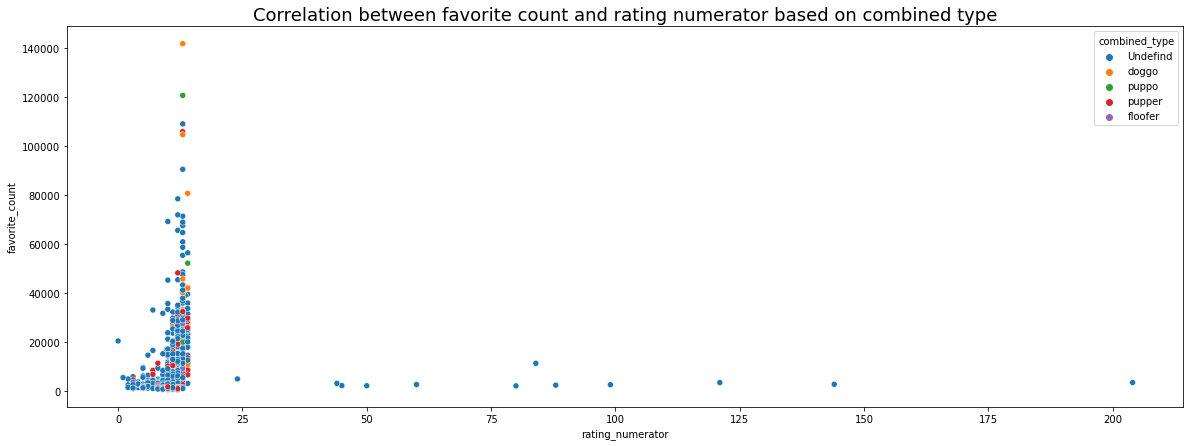

In [181]:
plt.figure(figsize = (20,7))
sns.scatterplot(data = merged_df,
 x='rating_numerator', 
 y='favorite_count',
 hue='combined_type'
 )
plt.title('Correlation between favorite count and rating numerator based on combined type', size=18)
plt.show()

### Insights:
1. As you see above there some outlier for rating wthi rating more than 25.

2. You can find there is correlation between these attirbutes(avorite count and rating numerator) becaue when rating is less than 10 that make favortie lass than 10k and the opsite if the rating mor than 10 the faviourte most in 40k.

3. As we see before most of dog type is undefied and that pupper is have more rating.
